Chatbot question: 
    how to make a plot of the top 10 most mutated genes group by hugoGeneSymbol

Chatbot answer: 
    Based on the context provided, to generate a plot of the top 10 most mutated genes grouped by hugoGeneSymbol, you would first need to gather and process the mutations data using the cbioportal API, convert the mutations data to a pandas DataFrame, and then group and count the mutations by gene symbol. Finally, you would use matplotlib to visualize the top 10 most mutated genes. Here is how you can achieve this step-by-step in Python:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from bravado.client import SwaggerClient

# Connect to the cbioportal API
cbioportal = SwaggerClient.from_url('https://www.cbioportal.org/api/v2/api-docs', config={"validate_requests": False, "validate_responses": False, "validate_swagger_spec": False})

# Assuming you have already fetched the mutations data as shown in the context
mutations = cbioportal.Mutations.getMutationsInMolecularProfileBySampleListIdUsingGET(
    molecularProfileId='msk_impact_2017_mutations',
    sampleListId='msk_impact_2017_all',
    projection='DETAILED'
).result()



In [12]:
# # For illustration, we'll use a placeholder for mutations data
# mutations = [
#     # Placeholder mutations data structure
#     {'gene': {'hugoGeneSymbol': 'TP53'}, 'uniqueSampleKey': 'sample1'},
#     {'gene': {'hugoGeneSymbol': 'TP53'}, 'uniqueSampleKey': 'sample2'},
#     # Add more mutation records as needed
# ]

# Convert mutations data to a pandas DataFrame
mdf = pd.DataFrame.from_dict([
    dict(
        {k: getattr(m, 'k', None) for k in ['uniqueSampleKey']},
        **{k: getattr(m['gene'], k, None) for k in ['hugoGeneSymbol']}
    )
    for m in mutations
])



In [51]:
# Group the mutations by gene name and count the number of unique samples per gene
sample_count_per_gene = mdf.groupby('hugoGeneSymbol')['uniqueSampleKey'].nunique()

# Sort the counts and take the top 10
top10_mutated_genes = sample_count_per_gene.sort_values(ascending=False).head(10)
print(top10_mutated_genes)


hugoGeneSymbol
TP53      4538
KRAS      1643
TERT      1460
PIK3CA    1355
APC       1121
ARID1A     875
KMT2D      851
PTEN       665
KMT2C      642
EGFR       636
Name: uniqueSampleKey, dtype: int64


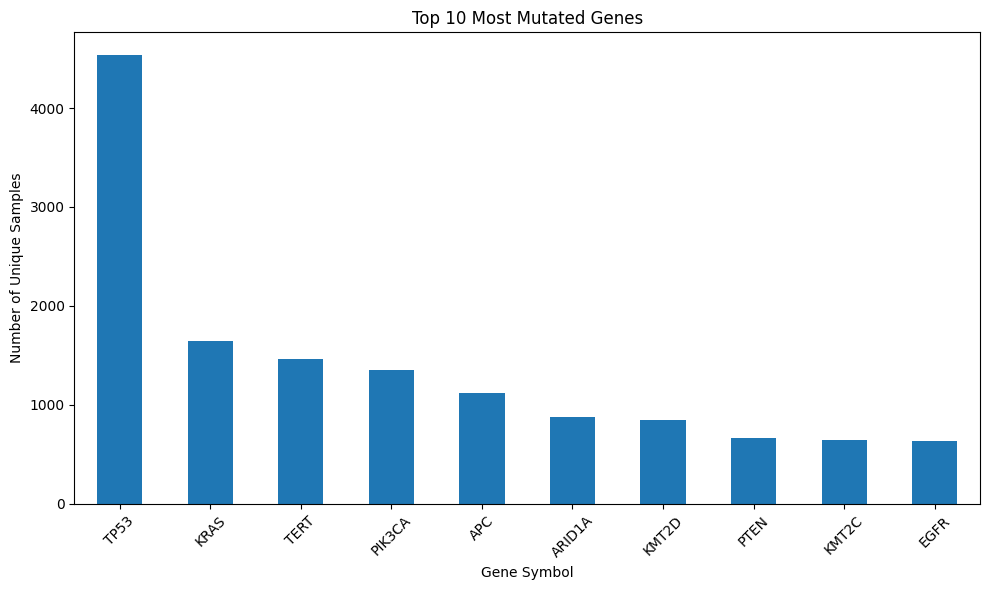

In [49]:
# Plotting
plt.figure(figsize=(10, 6))
top10_mutated_genes.plot(kind='bar')
plt.title('Top 10 Most Mutated Genes')
plt.xlabel('Gene Symbol')
plt.ylabel('Number of Unique Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Make sure to replace the placeholder mutations data structure with the actual mutations data fetched from the cbioportal API as indicated in the comments. This code snippet assumes that you have correctly fetched and structured the mutations data as per the context provided.

In [ ]:
original image: 

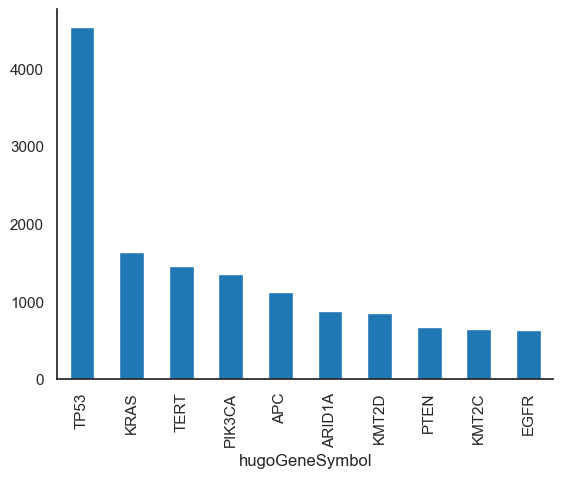

In [ ]:
Chatbot question: 
     how to make a pie chart of the top 10 most mutated genes group by hugoGeneSymbol

Chatbot answer:
    Based on the context provided, to visualize the top 10 most mutated genes with a pie chart using matplotlib, you can follow these steps. This involves creating a dataframe from the mutations data, counting the unique samples per gene, and then plotting the top 10 counts in a pie chart. I'll assume you've already fetched the mutations data and have it in a variable named mutations.

Let's start by transforming the mutations data into a pandas DataFrame, then counting the unique samples per gene, and finally plotting the top 10 most mutated genes in a pie chart.

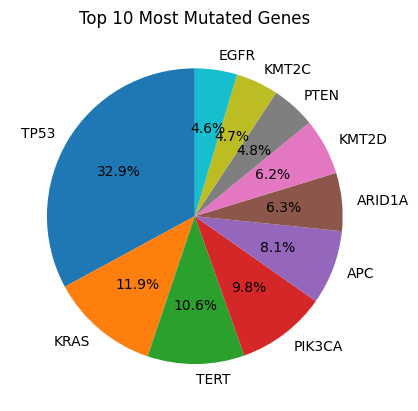

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming mutations is a list of mutation objects fetched from the cBioPortal API
# First, we create a DataFrame from the mutations data
mdf = pd.DataFrame.from_dict([
    # Combining two dictionaries: one with mutation details, one with gene details
    dict({k: getattr(m, k) for k in dir(m)},
         **{k: getattr(m.gene, k) for k in dir(m.gene)})
    for m in mutations
])

# Counting unique samples per gene
sample_count_per_gene = mdf.groupby('hugoGeneSymbol')['uniqueSampleKey'].nunique()

# Sorting the counts and selecting the top 10
top_10_mutated_genes = sample_count_per_gene.sort_values(ascending=False).head(10)

# Plotting
fig, ax = plt.subplots()
top_10_mutated_genes.plot(kind='pie', autopct='%1.1f%%', ax=ax, startangle=90)
ax.set_ylabel('')  # Remove the y-label as it's not needed for pie charts
ax.set_title('Top 10 Most Mutated Genes')

plt.show()

This code snippet does the following:

It first converts the mutation data into a pandas DataFrame, with one row per mutation and including gene details.
It then groups the data by the Hugo gene symbol (representing genes) and counts the number of unique samples for each gene.
It sorts these counts in descending order and selects the top 10.
Finally, it plots these top 10 counts as a pie chart, using matplotlib's plot function on the pandas DataFrame.
Remember, this assumes you have already fetched and structured the mutations data appropriately as indicated in the context documents.

In [ ]:
Original image:


In [52]:
top10_mutated_genes = sample_count_per_gene.sort_values(ascending=False).head(10)
print(top10_mutated_genes)

hugoGeneSymbol
TP53      4538
KRAS      1643
TERT      1460
PIK3CA    1355
APC       1121
ARID1A     875
KMT2D      851
PTEN       665
KMT2C      642
EGFR       636
Name: uniqueSampleKey, dtype: int64


In [54]:
total = 0
for i,n in enumerate(top10_mutated_genes):
    total += n
print(total)    

13786


In [58]:
for k,v in top10_mutated_genes.items():
    percentage = (v/total)*100
    print(f"The {k} percentage is {percentage:.2f}%")

The TP53 percentage is 32.92%
The KRAS percentage is 11.92%
The TERT percentage is 10.59%
The PIK3CA percentage is 9.83%
The APC percentage is 8.13%
The ARID1A percentage is 6.35%
The KMT2D percentage is 6.17%
The PTEN percentage is 4.82%
The KMT2C percentage is 4.66%
The EGFR percentage is 4.61%


In [ ]:
Chatbot question: 
    how to make a scatter chart of the top 10 most mutated genes group by hugoGeneSymbol

Chatbot answer: 
    To generate a scatter chart of the top 10 most mutated genes grouped by hugoGeneSymbol, you first need to count the mutations per gene, sort them to find the top 10, and then plot these. Below is a code snippet that demonstrates how to achieve this using matplotlib and pandas in Python, assuming you have already obtained the mutations data and stored it in a dataframe called mdf:

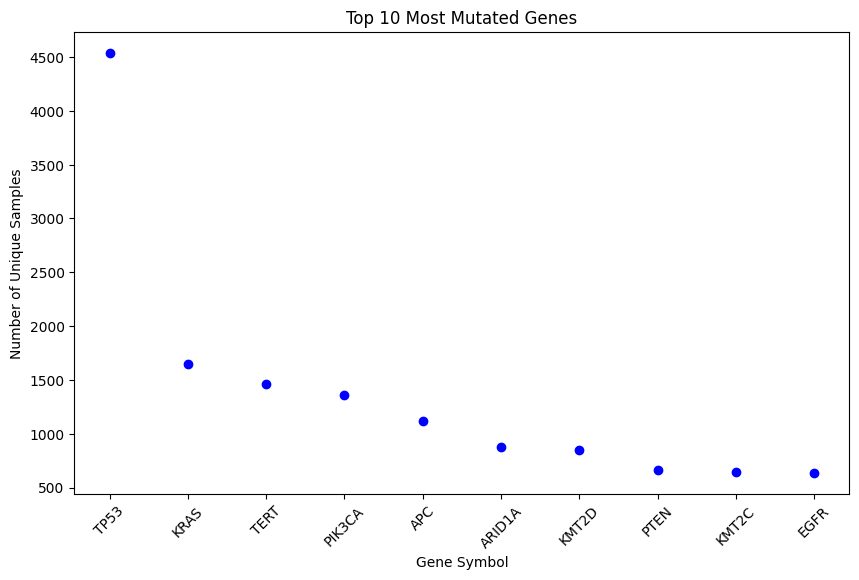

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'mdf' is your DataFrame that contains mutations data
# with columns 'hugoGeneSymbol' and 'uniqueSampleKey'

# Group by 'hugoGeneSymbol' and count unique samples per gene
sample_count_per_gene = mdf.groupby('hugoGeneSymbol')['uniqueSampleKey'].nunique()

# Sort the counts in descending order and select the top 10
top_10_mutated_genes = sample_count_per_gene.sort_values(ascending=False).head(10)

# Generate a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(top_10_mutated_genes.index, top_10_mutated_genes.values, color='blue')

plt.title('Top 10 Most Mutated Genes')  # Title of the plot
plt.xlabel('Gene Symbol')  # X-axis label
plt.ylabel('Number of Unique Samples')  # Y-axis label
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()

This code snippet does the following:

Groups the data by hugoGeneSymbol and counts the number of unique samples for each gene using the nunique() function.
Sorts these counts in descending order to find the genes with the highest mutation counts and selects the top 10.
Uses plt.scatter() to generate a scatter plot, setting the figure size for better visibility, and adding appropriate titles and labels.
The rotation=45 parameter in plt.xticks() is used to rotate the gene symbols on the x-axis for better readability.
Make sure that your dataframe mdf includes the relevant data (i.e., hugoGeneSymbol and uniqueSampleKey columns) obtained from the mutation data as described in the context.

In [ ]:
Correct answer:

In [60]:
top10_mutated_genes = sample_count_per_gene.sort_values(ascending=False).head(10)
print(top10_mutated_genes)

hugoGeneSymbol
TP53      4538
KRAS      1643
TERT      1460
PIK3CA    1355
APC       1121
ARID1A     875
KMT2D      851
PTEN       665
KMT2C      642
EGFR       636
Name: uniqueSampleKey, dtype: int64
